<a href="https://colab.research.google.com/github/venkat2020-github/DeepLearning/blob/main/3_4_Classifying_movie_reviews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Importing required libraries
import numpy as np
import pandas as pd

In [5]:
from keras import models
from keras import layers
from keras.datasets import imdb #Internet Movie review Database

In [6]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

17473536/17464789 [==============================] - 1s 0us/step


In [7]:
train_data.shape

(25000,)

In [8]:
test_data.shape

(25000,)

In [9]:
train_labels.shape

(25000,)

In [10]:
test_labels.shape

(25000,)

In [11]:
train_data

array([list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]),
       list([1, 194, 1153, 194, 8255, 78, 228,

In [12]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [13]:
test_data

array([list([1, 591, 202, 14, 31, 6, 717, 10, 10, 2, 2, 5, 4, 360, 7, 4, 177, 5760, 394, 354, 4, 123, 9, 1035, 1035, 1035, 10, 10, 13, 92, 124, 89, 488, 7944, 100, 28, 1668, 14, 31, 23, 27, 7479, 29, 220, 468, 8, 124, 14, 286, 170, 8, 157, 46, 5, 27, 239, 16, 179, 2, 38, 32, 25, 7944, 451, 202, 14, 6, 717]),
       list([1, 14, 22, 3443, 6, 176, 7, 5063, 88, 12, 2679, 23, 1310, 5, 109, 943, 4, 114, 9, 55, 606, 5, 111, 7, 4, 139, 193, 273, 23, 4, 172, 270, 11, 7216, 2, 4, 8463, 2801, 109, 1603, 21, 4, 22, 3861, 8, 6, 1193, 1330, 10, 10, 4, 105, 987, 35, 841, 2, 19, 861, 1074, 5, 1987, 2, 45, 55, 221, 15, 670, 5304, 526, 14, 1069, 4, 405, 5, 2438, 7, 27, 85, 108, 131, 4, 5045, 5304, 3884, 405, 9, 3523, 133, 5, 50, 13, 104, 51, 66, 166, 14, 22, 157, 9, 4, 530, 239, 34, 8463, 2801, 45, 407, 31, 7, 41, 3778, 105, 21, 59, 299, 12, 38, 950, 5, 4521, 15, 45, 629, 488, 2733, 127, 6, 52, 292, 17, 4, 6936, 185, 132, 1988, 5304, 1799, 488, 2693, 47, 6, 392, 173, 4, 2, 4378, 270, 2352, 4, 1500, 7, 

In [14]:
test_data[0]

[1,
 591,
 202,
 14,
 31,
 6,
 717,
 10,
 10,
 2,
 2,
 5,
 4,
 360,
 7,
 4,
 177,
 5760,
 394,
 354,
 4,
 123,
 9,
 1035,
 1035,
 1035,
 10,
 10,
 13,
 92,
 124,
 89,
 488,
 7944,
 100,
 28,
 1668,
 14,
 31,
 23,
 27,
 7479,
 29,
 220,
 468,
 8,
 124,
 14,
 286,
 170,
 8,
 157,
 46,
 5,
 27,
 239,
 16,
 179,
 2,
 38,
 32,
 25,
 7944,
 451,
 202,
 14,
 6,
 717]

In [15]:
from keras_preprocessing import sequence
max([max(sequence)] for sequence in train_data)

[9999]

In [16]:
max([max(sequence) for sequence in test_data])

9999

In [19]:
word_index = imdb.get_word_index() #word_index is a dictionary mapping words to an integer index
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()]) #Reverses it, mapping integer indices to words

In [20]:
decoded_review = ' '.join(
    [reverse_word_index.get(i - 3, '?') for i in train_data[0]]) #Decodes the review. Note that the indices reserved indices for 'padding', 'start of sequence', and 'unknown'.

Preparing the Data

In [21]:
#Encoding the integer sequences into a binary matrix
def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1
  return results

In [22]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [23]:
x_train.shape

(25000, 10000)

In [25]:
x_test.shape

(25000, 10000)

In [26]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [27]:
x_test[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [28]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

Building your network

In [29]:
#The model definition
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [30]:
#Compile the model
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [36]:
#Configure the optimizer
import tensorflow as tf
from tensorflow.keras import optimizers
model.compile(optimizer=optimizers.RMSprop(lr=0.001), loss='binary_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [38]:
#Using custom losses and metrics
from keras import losses
from keras import metrics
model.compile(optimizer=optimizers.RMSprop(lr=0.001), loss=losses.binary_crossentropy, metrics=[metrics.binary_accuracy])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


Validating your approach

In [39]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

In [40]:
y_val=y_train[:10000]
partial_y_train = y_train[10000:]

In [42]:
#Training your model
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

In [44]:
history = model.fit(partial_x_train, partial_y_train,epochs=20, batch_size=512, validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 2s 52ms/step - loss: 0.2291 - acc: 0.9271 - val_loss: 0.2910 - val_acc: 0.8847
Epoch 2/20
30/30 [==============================] - 1s 36ms/step - loss: 0.1801 - acc: 0.9429 - val_loss: 0.2941 - val_acc: 0.8814
Epoch 3/20
30/30 [==============================] - 1s 37ms/step - loss: 0.1456 - acc: 0.9533 - val_loss: 0.2956 - val_acc: 0.8829
Epoch 4/20
30/30 [==============================] - 1s 36ms/step - loss: 0.1220 - acc: 0.9617 - val_loss: 0.2933 - val_acc: 0.8845
Epoch 5/20
30/30 [==============================] - 1s 36ms/step - loss: 0.1001 - acc: 0.9699 - val_loss: 0.3200 - val_acc: 0.8774
Epoch 6/20
30/30 [==============================] - 1s 36ms/step - loss: 0.0824 - acc: 0.9784 - val_loss: 0.3229 - val_acc: 0.8837
Epoch 7/20
30/30 [==============================] - 1s 37ms/step - loss: 0.0691 - acc: 0.9827 - val_loss: 0.3412 - val_acc: 0.8795
Epoch 8/20
30/30 [==============================] - 1s 36ms/step - loss: 0.0547 - a

In [47]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

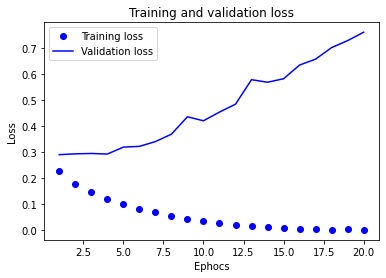

In [50]:
#Plotting the training and validation loss
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc = history_dict['acc']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss_values, 'bo', label = 'Training loss') #"bo" is for "blue dot".
plt.plot(epochs, val_loss_values, 'b', label='Validation loss') #"b" is for "solid blue line".
plt.title('Training and validation loss')
plt.xlabel('Ephocs')
plt.ylabel('Loss')
plt.legend()
plt.show()

<function matplotlib.pyplot.show>

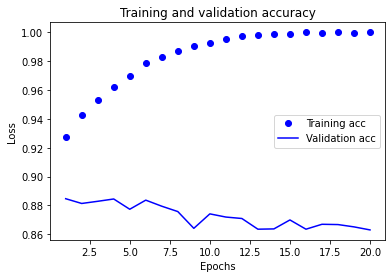

In [54]:
#Plotting the training and validation accuracy
plt.clf() #Clears the figure
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show

In [58]:
#Retraining a model from scratch
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 2s 30ms/step - loss: 0.4606 - accuracy: 0.8202
Epoch 2/4
49/49 [==============================] - 1s 29ms/step - loss: 0.2685 - accuracy: 0.9098
Epoch 3/4
49/49 [==============================] - 1s 30ms/step - loss: 0.2045 - accuracy: 0.9289
Epoch 4/4
782/782 [==============================] - 2s 2ms/step - loss: 0.3004 - accuracy: 0.8816


In [59]:
results

[0.30037543177604675, 0.8815600275993347]